In [1]:
import torch
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/sound Classification/images/'
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
batch_size = 128

train_dir = path + 'Train'
test_dir = path + 'Test'
#googlenet takes 224x224 images as input, so we resize all of them
transformsTrain = transforms.Compose(
[   
  transforms.Resize(224),    
  transforms.RandomHorizontalFlip(),
  transforms.RandomRotation(30),
  transforms.ToTensor(),  
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) 

transformsTest = transforms.Compose(
[   
  transforms.Resize(224),    
 transforms.ToTensor(),
  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]) 


train_dataset = datasets.ImageFolder(root=train_dir, transform=transformsTrain)
#test_dataset = datasets.ImageFolder(root=test_dir, transform=transformsTest)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
#classes = test_dataset.classes
#print(classes)
#print("Test size", test_dataset)
print("Train size", train_dataset)

Train size Dataset ImageFolder
    Number of datapoints: 7894
    Root location: /content/drive/My Drive/sound Classification/images/Train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [5]:
gnet=models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


In [6]:
print(gnet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [7]:
for param in gnet.parameters():
    param.requires_grad = False

In [10]:
import torch.nn as nn
#classes=10
last_layer_inputs = gnet.fc.in_features
last_layer = nn.Linear(last_layer_inputs, 10)
gnet.fc = last_layer

# after completing your model, if GPU is available, move the model to GPU
gnet.to(device)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Epoch: 1 | training loss: 0.00014303959324024618 
Epoch: 1 | training loss: 0.0001429477779311128 
Epoch: 1 | training loss: 0.0001422206696588546 
Epoch: 1 | training loss: 0.00014114804434939288 
Epoch: 1 | training loss: 0.00013947994157206267 
Epoch: 1 | training loss: 0.00013852471359617388 
Epoch: 1 | training loss: 0.0001383074517694435 
Epoch: 1 | training loss: 0.00013788823889626656 
Epoch: 1 | training loss: 0.0001372018725507789 
Epoch: 1 | training loss: 0.0001366384603898041 
Epoch: 1 | training loss: 0.00013637954940680754 
Epoch: 1 | training loss: 0.00013568982103606686 
Epoch: 1 | training loss: 0.00013526877871929453 
Epoch: 1 | training loss: 0.000134420909619491 
Epoch: 1 | training loss: 0.00013385399361141027 
Epoch: 1 | training loss: 0.00013363243033381877 
Epoch: 1 | training loss: 0.0001330722657525364 
Epoch: 1 | training loss: 0.00013261177809908986 
Epoch: 1 | training loss: 0.0001321391257653503 
Epoch: 1 | training loss: 0.0001315976151090581 
Epoch: 1 |

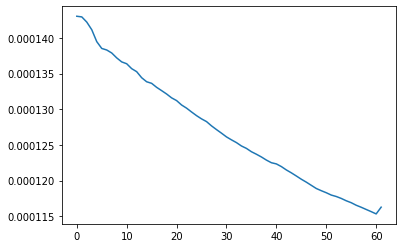

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(gnet.parameters(), lr=0.001)
train_loss = []

def train(epochs):
    gnet.train()
    for epoch in range(epochs):
      running_loss = 0.
      n_samples = 0
        
      for idx, (inputs, targets) in enumerate(train_loader):
          inputs = inputs.to(device)
          targets = targets.to(device) 
        
          n_samples += inputs.size()[0]          
          outputs = gnet(inputs)
          
          loss = criterion(outputs, targets)
          running_loss += loss.detach().item() / inputs.size()[0]
            
          optimizer.zero_grad() 
          loss.backward()
          optimizer.step()

          train_loss.append(running_loss / n_samples)      
     
          print("Epoch: {} | training loss: {} ".format(epoch + 1, train_loss[-1])) 

    return train_loss
    
train_loss = train(1)  

#import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_loss)

In [12]:
test_dataset = datasets.ImageFolder(root=test_dir, transform=transformsTest)
#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
classes = test_dataset.classes
print(classes)
print("Test size", test_dataset)
#print("Train size", train_dataset)

['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']
Test size Dataset ImageFolder
    Number of datapoints: 837
    Root location: /content/drive/My Drive/sound Classification/images/Test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


Accuracy on training data:  62.0
Accuracy on training data:  63.0
Accuracy on training data:  59.0
Accuracy on training data:  60.0
Accuracy on training data:  60.0
Accuracy on training data:  59.0
Accuracy on training data:  59.0
Accuracy on training data:  57.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  57.99999999999999
Accuracy on training data:  57.99999999999999
Accuracy on training data:  57.99999999999999
Accuracy on training data:  57.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  57.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99999999999999
Accuracy on training data:  56.99

ValueError: ignored

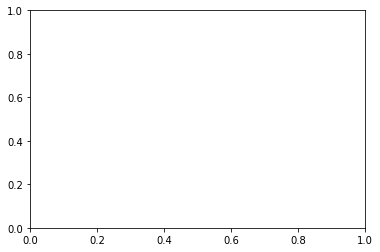

In [16]:
import numpy as np
acc_train=[]
acc_test=[]

test_loss = 0
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))

gnet.eval()
total = 0
correct = 0.
with torch.no_grad():
    for data in train_loader:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = gnet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 
        acc=correct/total *100
        acc_train.append(acc)
        
        print("Accuracy on training data: ", round(correct/total, 2)*100)

total = 0.
correct = 0
with torch.no_grad():
    for data in test_loader:
        inputs, targets= data
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = gnet(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item() 
        total += inputs.size()[0] 
        acc=correct/total *100
        acc_test.append(acc)
        
        print("Accuracy on testing data: ", round(correct/total, 2)*100)



plt.figure()
plt.plot(acc_train)
plt.plot(acc_test)
plt.legend()

No handles with labels found to put in legend.


['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']
Test size Dataset ImageFolder
    Number of datapoints: 837
    Root location: /content/drive/My Drive/sound Classification/images/Test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Train size Dataset ImageFolder
    Number of datapoints: 7894
    Root location: /content/drive/My Drive/sound Classification/images/Train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

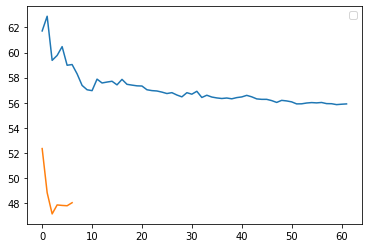

In [20]:
plt.figure()
plt.plot(acc_train)
plt.plot(acc_test)
plt.legend()
classes = test_dataset.classes
print(classes)
print("Test size", test_dataset)
print("Train size", train_dataset)

In [21]:
confusion_matrix = torch.zeros(len(classes),len(classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = gnet(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[ 9.,  0., 10.,  6., 10., 35.,  0.,  1., 28.,  1.],
        [ 0.,  9.,  0.,  3.,  2.,  0.,  0.,  1.,  3., 15.],
        [ 0.,  0., 51., 25.,  5.,  2.,  0.,  0., 10.,  7.],
        [ 0.,  0., 14., 71.,  0.,  1.,  0.,  0.,  9.,  5.],
        [ 1.,  2.,  5., 18., 35.,  6.,  0.,  7.,  7., 19.],
        [ 0.,  0.,  3.,  4.,  1., 30.,  0., 43.,  7.,  5.],
        [ 0.,  0.,  0., 20.,  0.,  0., 10.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  4.,  0.,  0.,  0., 74.,  0., 18.],
        [ 0.,  0.,  8., 11.,  8.,  3.,  0.,  2., 49.,  2.],
        [ 0.,  0., 17.,  7.,  1.,  0.,  0.,  0., 11., 64.]])


In [27]:
## plot confusion matrix
#get per class accuracy
class_names = test_dataset.classes
print(confusion_matrix.diag()/confusion_matrix.sum(1))
print(class_names)

tensor([0.0900, 0.2727, 0.5100, 0.7100, 0.3500, 0.3226, 0.3125, 0.7708, 0.5904,
        0.6400])
['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']


In [23]:
import numpy as np
class_names = test_dataset.classes
print(class_names)

def imshow(image):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)

['0_air_conditioner', '1_car_horn', '2_children_playing', '3_dog_bark', '4_drilling', '5_engine_idling', '6_gun_shot', '7_jackhammer', '8_siren', '9_street_music']


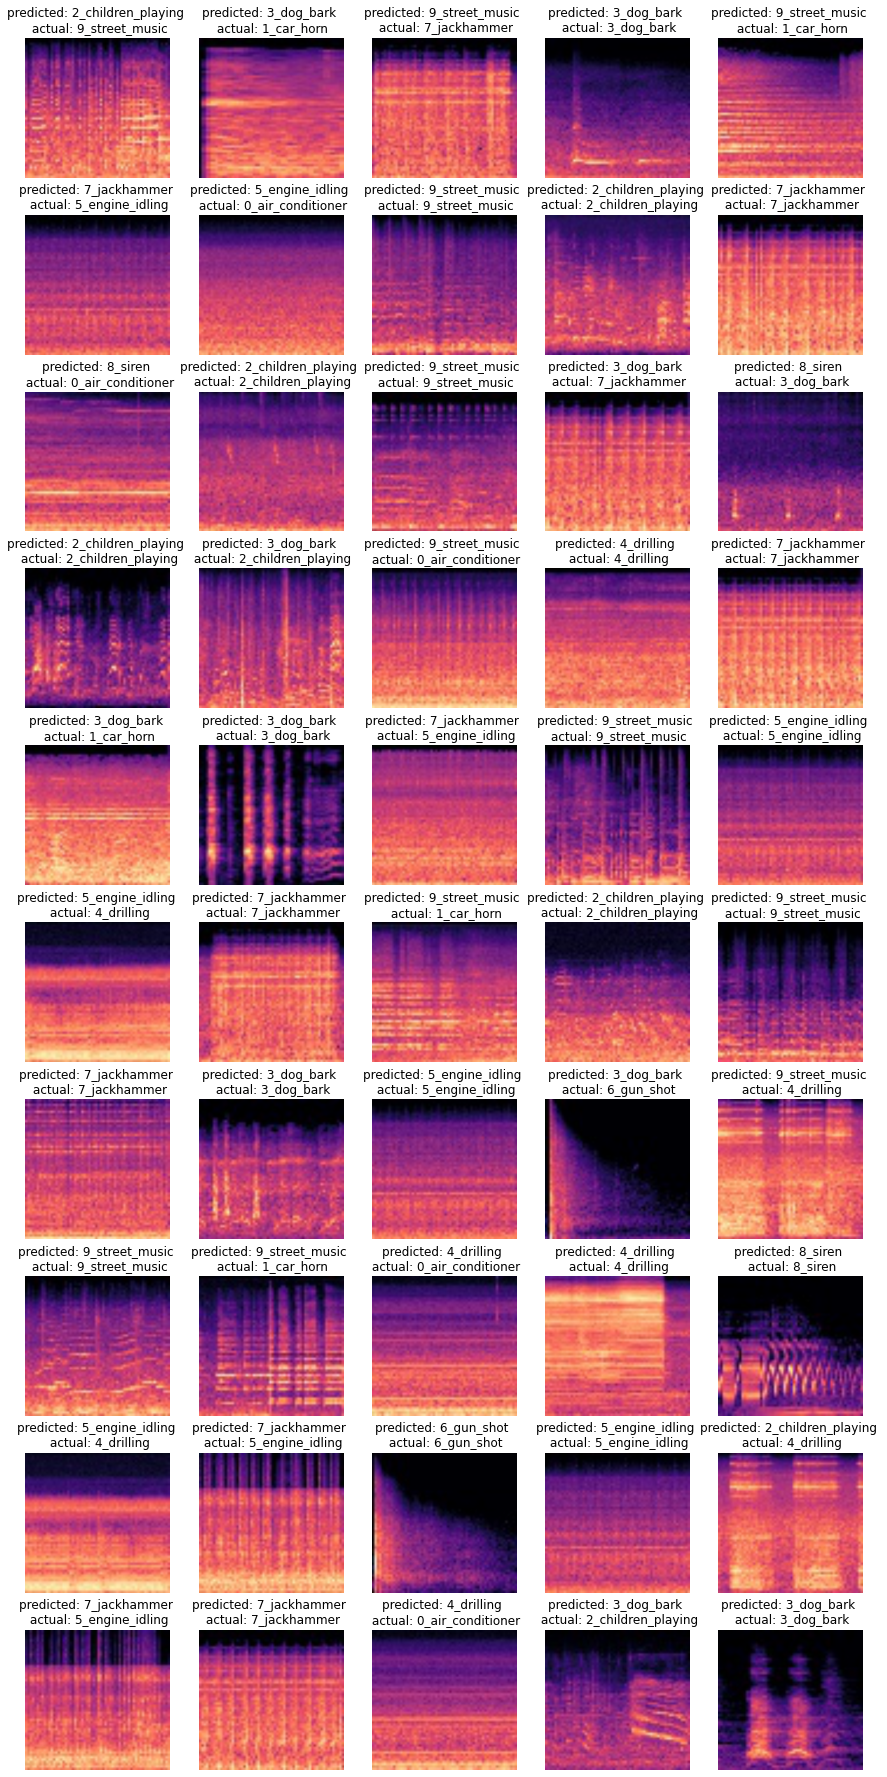

In [24]:
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True)

def visualize_results(model):   
    model.eval()    
    fig = plt.figure(figsize=(15, 32))
    inputs, targets = data
    inputs = inputs.to(device)
    targets = targets.to(device)
    outputs = gnet(inputs)
    _, preds = torch.max(outputs.data, 1)

    for j in range(50):
        ax = plt.subplot(10, 5, j+1)
        ax.axis('off')       
        ax.set_title('predicted: {} \n actual: {}'.format(class_names[preds[j]], class_names[targets[j]]))
        imshow(inputs.cpu().data[j])


visualize_results(gnet)

In [ ]:

checkpoint = {'model': NeuralNet(layer_dim, activations),
                  'state_dict': net.state_dict(),
                  'optimizer' : optimizer.state_dict()}
    torch.save(checkpoint, 'checkpoint.pth')

def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    model.eval()
    return model
    

tensor([[ 9.,  0., 10.,  6., 10., 35.,  0.,  1., 28.,  1.],
        [ 0.,  9.,  0.,  3.,  2.,  0.,  0.,  1.,  3., 15.],
        [ 0.,  0., 51., 25.,  5.,  2.,  0.,  0., 10.,  7.],
        [ 0.,  0., 14., 71.,  0.,  1.,  0.,  0.,  9.,  5.],
        [ 1.,  2.,  5., 18., 35.,  6.,  0.,  7.,  7., 19.],
        [ 0.,  0.,  3.,  4.,  1., 30.,  0., 43.,  7.,  5.],
        [ 0.,  0.,  0., 20.,  0.,  0., 10.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  4.,  0.,  0.,  0., 74.,  0., 18.],
        [ 0.,  0.,  8., 11.,  8.,  3.,  0.,  2., 49.,  2.],
        [ 0.,  0., 17.,  7.,  1.,  0.,  0.,  0., 11., 64.]])


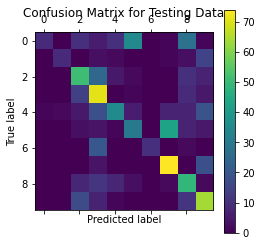

In [25]:
def conf_mat(con_mat):
    
    # Plot Confusion Matrix Data as a Matrix
    print(con_mat)
    plt.matshow(con_mat)
    plt.title('Confusion Matrix for Testing Data')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
conf_mat(confusion_matrix)

In [28]:
import pickle

mydict = {"loss": train_loss, "model":gnet, "confusionmatrix":confusion_matrix , "trainAcc":acc_train,"valAcc":acc_test}

pickle.dump(mydict, open(path+"goognet.pkl", "wb"))

loaded = pickle.load(open(path+"goognet.pkl", "rb"))
print(loaded)

{'loss': [0.00014303959324024618, 0.0001429477779311128, 0.0001422206696588546, 0.00014114804434939288, 0.00013947994157206267, 0.00013852471359617388, 0.0001383074517694435, 0.00013788823889626656, 0.0001372018725507789, 0.0001366384603898041, 0.00013637954940680754, 0.00013568982103606686, 0.00013526877871929453, 0.000134420909619491, 0.00013385399361141027, 0.00013363243033381877, 0.0001330722657525364, 0.00013261177809908986, 0.0001321391257653503, 0.0001315976151090581, 0.00013121492451145534, 0.0001305973941767165, 0.00013015440313408718, 0.00012961738805946274, 0.00012910372955957428, 0.00012865014342913547, 0.00012826894790460183, 0.00012766911614952342, 0.00012714604712653392, 0.00012664544895718183, 0.00012612281176599584, 0.00012570802982736495, 0.00012532208656370076, 0.00012484989458564944, 0.0001245095648170848, 0.00012404310291458387, 0.00012369098034026605, 0.00012330907377059033, 0.00012287179038722595, 0.00012250242943991906, 0.0001223354709331832, 0.00012196160726792

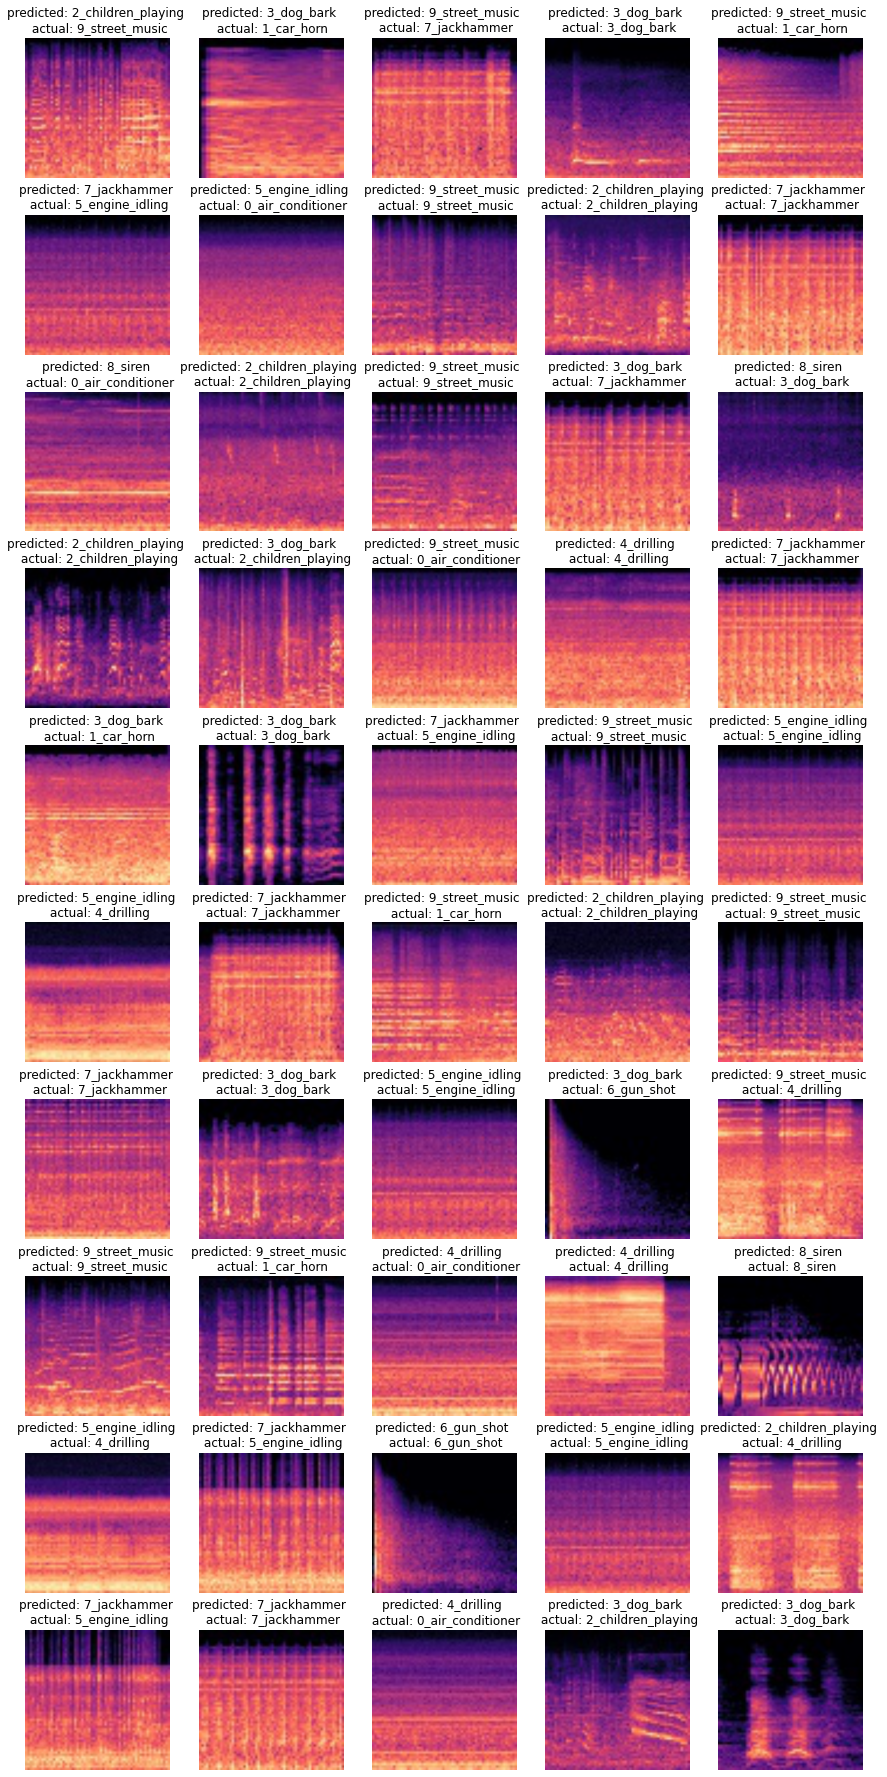

In [29]:
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True)

def visualize_results(model):   
    model.eval()    
    fig = plt.figure(figsize=(15, 32))
    inputs, targets = data
    inputs = inputs.to(device)
    targets = targets.to(device)
    outputs = gnet(inputs)
    _, preds = torch.max(outputs.data, 1)

    for j in range(50):
        ax = plt.subplot(10, 5, j+1)
        ax.axis('off')       
        ax.set_title('predicted: {} \n actual: {}'.format(class_names[preds[j]], class_names[targets[j]]))
        imshow(inputs.cpu().data[j])


visualize_results(gnet)